# Dynamic Profile Scrape 
In this example, we will subclass and extend instascrape.Profile to dynamically scrape all the posts of a profile using Selenium. Additionally, all posts will be loaded as instascrape.Post objects which will give us the ability to scrape individual posts for all of their data as well.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from dynamic_profile import DynamicProfile
from selenium.webdriver import Chrome, ChromeOptions # pip3 install selenium

### Download Chrome WebDriver
Besides Selenium, you also need Chrome WebDriver for this example. Download and extract from the below link.

Download: https://sites.google.com/a/chromium.org/chromedriver/downloads

Set `webdriver_executable` to the absolute path of the chromedriver executable

In [15]:
webdriver_executable = 'path/to/webdriver/chromedriver'

### Scraping the data 
First, we'll start by scraping the data with our DynamicProfile subclass of instascrape.Profile. To get an understanding of how this class works, go take a look at it's source in dynamic_profile.py included in this folder. For the purpose of this exercise, it will make requests synchronously but if you wanted to speed it up, you could rewrite this asynchrounously.

In [2]:
username = 'realpython'
max_posts_to_load = 50
profile = DynamicProfile.from_username(username)
profile.load() # get basic profile info (e.g followers, followings)
profile.dynamic_load(Chrome(webdriver_executable), max_posts=max_posts_to_load) # get posts

Read 0 posts
'accessibility_caption'
Read 10 posts


### Plotting the data 
Now that the data has been scraped, we can get into analyzing it! Let's clean it up a little, create a DataFrame, and get going with plotting this data. 

First, let's build a list of tuples where each tuple represents a posts upload date, the amount of likes a post got, and the amount of comments. 

In [3]:
data_arr = []
for post in profile.posts:
    try:
        data_arr.append((post.upload_date, post.likes, post.comments))
    except AttributeError as e: 
        pass 

'Post' object has no attribute 'upload_date'


With that list of tuples now, we can instantiate a pandas.DataFrame to make working with our data more manageable. 

In [4]:
dataframe = pd.DataFrame(data_arr, columns=['datetime', 'likes', 'comments'])                          
dataframe = dataframe.sort_values(by=['datetime']).reset_index(drop=True)   #Sort by date
dataframe.head()                                                            #Show first few data points

,datetime,likes,comments
0,2020-08-13 22:20:05,81,0
1,2020-08-18 22:20:10,78,0
2,2020-08-23 16:52:06,110,0
3,2020-08-25 22:20:07,121,1
4,2020-08-27 22:20:05,75,0


Now that we have our DataFrame, we can begin exploring this profile's data. Let's get a simple scatter plot so we can see if there are any trends we can see right off the bat. 

11533


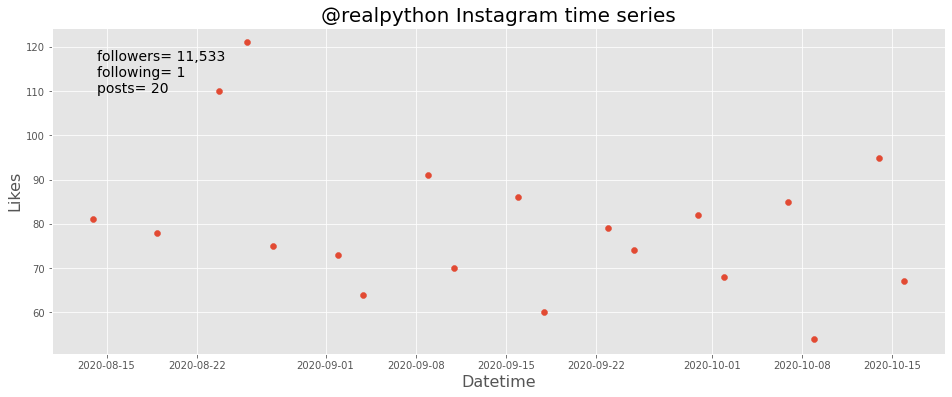

In [14]:
from pandas.plotting import register_matplotlib_converters

plt.style.use('ggplot')

#Draw the scatter plot
plt.scatter(dataframe['datetime'], dataframe['likes'])
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches(16, 6)

#Write text where applicable 
print(profile.followers)
description = f"followers={profile.followers: ,}\n"
description += f"following={profile.following: ,}\n"
description += f"posts={len(profile.posts): ,}"
plt.text(0.05, 0.8, description, transform=ax.transAxes, fontsize=14)

#Write labels 
plt.xlabel('Datetime', fontsize=16)
plt.ylabel('Likes', fontsize=16)
plt.title(f'@{username} Instagram time series', fontsize=20)
# plt.legend(loc="upper left")
plt.show()